<a href="https://colab.research.google.com/github/Alejandra119/Criticas_y_Recomendaciones_de_Yelp_y_Google/blob/main/exploracion_google_metadata_sitios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploración Preliminar archivos Google Maps**

El objetivo de este notebook es poder entender la naturaleza, formato y estructuras que contienen los archivos de metadata de Google Maps, de tal modo que nos permita posteriormente realizar un proceso de ETL para preparar el datawarehouse. El análisis se realizo en 11 archivos brindados.

## **Librerias utilizadas**

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import json
from collections import Counter
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
import os

#Montamos colab con el Drive
drive.mount('/content/gdrive')

# Establecer ruta de acceso en drive
os.chdir("/content/gdrive/My Drive/proyecto_grupal/")

Mounted at /content/gdrive


## Metadata Sitios

Se importan los csv de metadata-sitios y se la pliaca el filtro de categoria a cada df indivudual para que no ocupen tanta memoria

In [3]:
df1 = pd.read_json('google/Google Maps/metadata-sitios/1.json', lines=True)
df1 = df1[df1['category'].apply(lambda x: any('steak house' in word.lower() or 'steak' in word.lower() or 'bistec' in word.lower() or 'beef' in word.lower() for word in x) if isinstance(x, list) else False)]

In [4]:
df2 = pd.read_json('google/Google Maps/metadata-sitios/2.json', lines=True)
df2 = df2[df2['category'].apply(lambda x: any('steak house' in word.lower() or 'steak' in word.lower() or 'bistec' in word.lower() or 'beef' in word.lower() for word in x) if isinstance(x, list) else False)]

In [5]:
df3 = pd.read_json('google/Google Maps/metadata-sitios/3.json', lines=True)
df3 = df3[df3['category'].apply(lambda x: any('steak house' in word.lower() or 'steak' in word.lower() or 'bistec' in word.lower() or 'beef' in word.lower() for word in x) if isinstance(x, list) else False)]

In [6]:
df4 = pd.read_json('google/Google Maps/metadata-sitios/4.json', lines=True)
df4 = df4[df4['category'].apply(lambda x: any('steak house' in word.lower() or 'steak' in word.lower() or 'bistec' in word.lower() or 'beef' in word.lower() for word in x) if isinstance(x, list) else False)]

In [7]:
df5 = pd.read_json('google/Google Maps/metadata-sitios/5.json', lines=True)
df5 = df5[df5['category'].apply(lambda x: any('steak house' in word.lower() or 'steak' in word.lower() or 'bistec' in word.lower() or 'beef' in word.lower() for word in x) if isinstance(x, list) else False)]

In [8]:
df6 = pd.read_json('google/Google Maps/metadata-sitios/6.json', lines=True)
df6 = df6[df6['category'].apply(lambda x: any('steak house' in word.lower() or 'steak' in word.lower() or 'bistec' in word.lower() or 'beef' in word.lower() for word in x) if isinstance(x, list) else False)]

In [9]:
df7 = pd.read_json('google/Google Maps/metadata-sitios/7.json', lines=True)
df7 = df7[df7['category'].apply(lambda x: any('steak house' in word.lower() or 'steak' in word.lower() or 'bistec' in word.lower() or 'beef' in word.lower() for word in x) if isinstance(x, list) else False)]

In [10]:
df8 = pd.read_json('google/Google Maps/metadata-sitios/8.json', lines=True)
df8 = df8[df8['category'].apply(lambda x: any('steak house' in word.lower() or 'steak' in word.lower() or 'bistec' in word.lower() or 'beef' in word.lower() for word in x) if isinstance(x, list) else False)]

In [11]:
df9 = pd.read_json('google/Google Maps/metadata-sitios/9.json', lines=True)
df9 = df9[df9['category'].apply(lambda x: any('steak house' in word.lower() or 'steak' in word.lower() or 'bistec' in word.lower() or 'beef' in word.lower() for word in x) if isinstance(x, list) else False)]

In [12]:
df10 = pd.read_json('google/Google Maps/metadata-sitios/10.json', lines=True)
df10 = df10[df10['category'].apply(lambda x: any('steak house' in word.lower() or 'steak' in word.lower() or 'bistec' in word.lower() or 'beef' in word.lower() for word in x) if isinstance(x, list) else False)]

In [13]:
df11 = pd.read_json('google/Google Maps/metadata-sitios/11.json', lines=True)
df11 = df11[df11['category'].apply(lambda x: any('steak house' in word.lower() or 'steak' in word.lower() or 'bistec' in word.lower() or 'beef' in word.lower() for word in x) if isinstance(x, list) else False)]

In [14]:
# Concatena todos los DataFrames en uno solo
metadata = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], ignore_index=True)

In [17]:
# Convertir las columnas que contienen listas o diccionarios a cadenas JSON
cols_with_complex_types = ['category', 'hours', 'MISC', 'relative_results']  # Ajusta esta lista según las columnas que contienen listas o diccionarios en tus DataFrames
for col in cols_with_complex_types:
    metadata[col] = metadata[col].apply(lambda x: json.dumps(x) if isinstance(x, (list, dict)) else x)

# Se eliminan las filas duplicadas
metadata.drop_duplicates(inplace=True)


## ETL

In [18]:
# Limpiar datos faltantes
metadata.dropna(inplace=True)

# Convertir la columna 'category' de string a lista (asumiendo que está almacenada como string)
metadata['category'] = metadata['category'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Convertir la columna 'hours' de string a lista (asumiendo que está almacenada como string)
metadata['hours'] = metadata['hours'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Convertir la columna 'MISC' de string a diccionario (asumiendo que está almacenada como string)
metadata['MISC'] = metadata['MISC'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Convertir la columna 'relative_results' de string a lista (asumiendo que está almacenada como string)
metadata['relative_results'] = metadata['relative_results'].apply(lambda x: eval(x) if isinstance(x, str) else x)


## EDA

In [19]:
# Obtenemos la información del dataframe como los nombres de las columnas, los valores totales, si cuentan con nulos y los tipos de datos.
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1531 entries, 0 to 3471
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1531 non-null   object 
 1   address           1531 non-null   object 
 2   gmap_id           1531 non-null   object 
 3   description       1531 non-null   object 
 4   latitude          1531 non-null   float64
 5   longitude         1531 non-null   float64
 6   category          1531 non-null   object 
 7   avg_rating        1531 non-null   float64
 8   num_of_reviews    1531 non-null   int64  
 9   price             1531 non-null   object 
 10  hours             1531 non-null   object 
 11  MISC              1531 non-null   object 
 12  state             1531 non-null   object 
 13  relative_results  1531 non-null   object 
 14  url               1531 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 191.4+ KB


##**Comentarios:**
El dataframe cuenta con la columna "category" que nos parecen más relevante. Se realizó un filtrado de la columna "category" para conocer los términos englobados del rubro "steakhouse" y se contaron las filas del dataframe "uno".

In [20]:
# Creamos una variable que nos brinde las categorías separadas.
categorias = metadata['category'].dropna().explode()

# Incorporamos en la variable "categorias" los valores unicos de la columna "category".
categorias = pd.Series(categorias.unique())

# Creamos una máscara que filtre los valores de "categorias" con las palabras claves para steakhouse.
mask = categorias.str.contains('steak|bistec|beef', case=False)

# Aplicamos la máscara en la variable "categorias".
categorias[mask]

4            Cheesesteak restaurant
11                      Steak house
20     French steakhouse restaurant
48              Japanese steakhouse
115          Korean beef restaurant
dtype: object

In [21]:
# Convertimos los valores de la columna "category" en str.
metadata['category'] =  metadata['category'].astype(str)

In [22]:
# Limpiamos los valores de la columna "category" eliminando los corchetes []
metadata['category'] = metadata['category'].str.replace(r'\[|\]', '', regex=True)

# Definimos los términos de búsqueda
terminos_steak = ['Cheesesteak restaurant', 'Steak house', 'Japanese steakhouse', 'French steakhouse restaurant']

# Creamos una expresión con los términos de búsqueda separados por el operador "|"
patron= '|'.join(terminos_steak)

# Buscamos los términos en la columna "category"
steakhouse= metadata[metadata['category'].str.contains(patron, regex=True)]

# Observamos el DataFrame con los valores filtrados
steakhouse.sample(5)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
2115,LongHorn Steakhouse,"LongHorn Steakhouse, 1095 Cobb Pl Blvd NW, Ken...",0x88f514df1f37184d:0x9db011de34712988,Casual steakhouse chain known for grilled beef...,34.000630,-84.584913,"'Steak house', 'Bar & grill', 'Barbecue restau...",4.4,1374,₩₩,"[[Wednesday, 11AM–10PM], [Thursday, 11AM–10PM]...","{'Service options': ['Curbside pickup', 'Takea...",Closed ⋅ Opens 11AM,"[0x88f514dd1007bff7:0xc9dab7ff7dc3fbf8, 0x88f5...",https://www.google.com/maps/place//data=!4m2!3...
2127,Outback Steakhouse,"Outback Steakhouse, 617 N Canal Rd, Lansing, M...",0x8822957f832410f7:0x4ce142272b1df7f4,Boisterous Australian-themed chain serving ste...,42.740423,-84.663152,"'Steak house', 'American restaurant', 'Austral...",4.1,1887,₩₩,"[[Wednesday, 11AM–10PM], [Thursday, 11AM–10PM]...",{'From the business': ['Identifies as women-le...,Closed ⋅ Opens 11AM,"[0x882295617df4db15:0x283eb344534abcf9, 0x8822...",https://www.google.com/maps/place//data=!4m2!3...
2931,Wawa,"Wawa, 14876 Narcoossee Rd, Orlando, FL 32832",0x88dd8a34219544c9:0x49470934b8831e5a,Convenience store chain known for sandwiches &...,28.348693,-81.233668,"'Convenience store', 'Breakfast restaurant', '...",4.3,128,$,"[[Thursday, Open 24 hours], [Friday, Open 24 h...","{'Service options': ['Curbside pickup', 'No-co...",Open 24 hours,"[0x88dd8a06e06fe2ef:0xbf1ee1580d9367cb, 0x88dd...",https://www.google.com/maps/place//data=!4m2!3...
1286,Wawa,"Wawa, 101 Hissey Rd, Grasonville, MD 21638",0x89b811910937ed71:0x4bfc01ee7d4fc784,Convenience store chain known for sandwiches &...,38.965575,-76.193265,"'Convenience store', 'Breakfast restaurant', '...",3.0,37,$,"[[Saturday, Open 24 hours], [Sunday, Open 24 h...","{'Service options': ['Curbside pickup', 'Deliv...",Open 24 hours,"[0x89b811ad883662d3:0x3b934f5b264e3008, 0x89b8...",https://www.google.com/maps/place//data=!4m2!3...
1938,Ruby River,"Ruby River, 4286 Riverdale Rd, Ogden, UT 84405...",0x87530f653916764f:0x2f811698e4be4cb7,"Rustic eatery serving aged, USDA Choice steaks...",41.184809,-111.986293,"'Steak house', 'Banquet hall', 'Restaurant', '...",4.1,984,₩₩,"[[Saturday, 11AM–9:30PM], [Sunday, 3–7PM], [Mo...","{'Service options': ['Curbside pickup', 'No-co...",Open ⋅ Closes 9:30PM,"[0x87530ec6c11030f9:0xd92444626b626c80, 0x8753...",https://www.google.com/maps/place//data=!4m2!3...


In [23]:
# Contamos las filas filtradas con las palabras claves.
steakhouse.shape[0]

1529

In [24]:
# Verificar si quedan nulos
metadata.isna().sum()

name                0
address             0
gmap_id             0
description         0
latitude            0
longitude           0
category            0
avg_rating          0
num_of_reviews      0
price               0
hours               0
MISC                0
state               0
relative_results    0
url                 0
dtype: int64

In [25]:
metadata.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,1531.000000,1531.000000,1531.000000,1531.000000
mean,36.892439,-88.993695,4.029197,630.629654
std,5.295828,16.467111,0.439284,965.770077
min,19.827267,-158.060606,1.600000,2.000000
25%,33.531098,-96.589331,3.800000,47.000000
50%,38.629700,-83.047560,4.100000,118.000000
75%,40.210371,-76.002399,4.300000,970.000000
max,64.825464,-68.756140,5.000000,8982.000000


In [26]:
mean = metadata['num_of_reviews'].mean()
std = metadata['num_of_reviews'].std()

threshold = 3 * std
outliers = (metadata['num_of_reviews'] < (mean - threshold)) | (metadata['num_of_reviews'] > (mean + threshold))

outliers_reviews = metadata[outliers]
outliers_reviews

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
1322,Kobe Japanese Steakhouse,"Kobe Japanese Steakhouse, 468 FL-436, Altamont...",0x88e771e60252bab5:0x79e4f5754c5966c2,Chefs put on a show at this Japanese chain off...,28.661000,-81.400723,"'Teppanyaki restaurant', 'Asian restaurant', '...",4.7,5548,$$,"[[Saturday, 12–10PM], [Sunday, 12–9:30PM], [Mo...","{'Service options': ['Curbside pickup', 'Deliv...",Closed ⋅ Opens 12PM,"[0x88e773726e0e877b:0x66ad33a9886bd3d7, 0x88e7...",https://www.google.com/maps/place//data=!4m2!3...
1361,Smokey Bones,"Smokey Bones, 2200 Baltimore-Reynoldsburg Rd, ...",0x883864c2592907c3:0x229ea69d3ea26c51,Smokehouse & barbecue dishes fill out the menu...,39.939764,-82.790571,"'American restaurant', 'Bar', 'Barbecue restau...",4.6,4277,$$,"[[Friday, 11AM–1AM], [Saturday, 11AM–1AM], [Su...","{'Service options': ['Outdoor seating', 'Curbs...",Open ⋅ Closes 1AM,"[0x883864c3055ab1fd:0xae1d8a8767fe9385, 0x8838...",https://www.google.com/maps/place//data=!4m2!3...
1470,Golden Corral Buffet & Grill,"Golden Corral Buffet & Grill, 5930 San Bernard...",0x8661205719f5b3d3:0xdd5f2c0c50288fbe,Family-friendly buffet chain featuring all-you...,27.561371,-99.504483,"'Buffet restaurant', 'American restaurant', 'B...",4.4,3990,$$,"[[Thursday, 11AM–8PM], [Friday, 11AM–8PM], [Sa...","{'Service options': ['Curbside pickup', 'Deliv...",Open ⋅ Closes 8PM,"[0x8661205f463182b1:0x7e25a36d98c1b6ef, 0x8661...",https://www.google.com/maps/place//data=!4m2!3...
1480,Golden Corral Buffet & Grill,"Golden Corral Buffet & Grill, 135 E Douglas Rd...",0x8816d21c85cd512b:0xb7dca599b96d2ed,Family-friendly buffet chain featuring all-you...,41.708887,-86.179505,"'Buffet restaurant', 'American restaurant', 'B...",4.0,4379,$$,"[[Thursday, 10:45AM–7:30PM], [Friday, 10:45AM–...","{'Service options': ['Curbside pickup', 'No-co...",Open ⋅ Closes 7:30PM,"[0x8816d23d6e871d69:0xe53f0a6b10d074e3, 0x8816...",https://www.google.com/maps/place//data=!4m2!3...
1483,Golden Corral Buffet & Grill,"Golden Corral Buffet & Grill, 11801 NE Fourth ...",0x5495b01bc87291d9:0x2911f06532cded0d,Family-friendly buffet chain featuring all-you...,45.666751,-122.551512,"'Buffet restaurant', 'American restaurant', 'B...",4.0,5137,$$,"[[Thursday, 11AM–8PM], [Friday, 11AM–8:30PM], ...","{'Service options': ['Curbside pickup', 'No-co...",Opens soon ⋅ 11AM,"[0x5495af91924319bd:0x7fca84ea24f20783, 0x5495...",https://www.google.com/maps/place//data=!4m2!3...
1691,Demos' Restaurant,"Demos' Restaurant, 1115 NW Broad St, Murfreesb...",0x8863f8652ef58f31:0x84e0cd98da883e9c,Family-friendly American eatery with a warm vi...,35.858421,-86.406039,"'Family restaurant', 'American restaurant', 'I...",4.5,3578,₩₩,"[[Tuesday, 11AM–10PM], [Wednesday, 11AM–10PM],...","{'Service options': ['Curbside pickup', 'Deliv...",Closed ⋅ Opens 11AM,"[0x8863f9b5da863ecd:0xdb30043d4497b7bf, 0x8863...",https://www.google.com/maps/place//data=!4m2!3...
1772,Applebee's Grill + Bar,"Applebee's Grill + Bar, 234 W 42nd St, New Yor...",0x89c25854a632f7bf:0x89afe090bc07afd0,Full-service chain bar & grill providing heart...,40.756427,-73.988834,"'Restaurant', 'American restaurant', 'Bar & gr...",3.7,3921,₩₩,"[[Monday, Closed], [Tuesday, Closed], [Wednesd...","{'Service options': ['Takeaway', 'Delivery', '...",Closed,"[0x89c2585599eceb35:0xfc622ec156df59c0, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
1779,Blues City Cafe,"Blues City Cafe, 138 Beale St, Memphis, TN 381...",0x87d57e9705a8fc6d:0x8b34cc989a8cae7,This old-school juke joint/eatery specializes ...,35.140139,-90.053301,"'Barbecue restaurant', 'Restaurant', 'Soul foo...",4.4,4146,₩₩,"[[Monday, 11AM–1AM], [Tuesday, 11AM–1AM], [Wed...","{'Service options': ['Delivery', 'Takeaway', '...",Closed ⋅ Opens 11AM,"[0x87d57e970f6e2d25:0xdac89550b6349abe, 0x87d5...",https://www.google.com/maps/place//data=!4m2!3...
1793,Texas Roadhouse,"Texas Roadhouse, 6095 Commerce Cir,

# Crear una nueva columna con las abreviaturas de los estados

In [28]:
metadata['state'] = metadata['address'].str.rsplit().str[-2]

In [29]:
metadata["state"].unique()

array(['PA', 'FL', 'NC', 'TX', 'VA', 'NJ', 'CA', 'MI', 'GA', 'AZ', 'NV',
       'AR', 'NY', 'AL', 'MO', 'KS', 'IL', 'SC', 'WA', 'NM', 'DC', 'AK',
       'HI', 'OK', 'UT', 'MD', 'NH', 'TN', 'NE', 'RI', 'OH', 'VT', 'CT',
       'DE', 'LA', 'ME', 'MA', 'WI', 'FC15,', 'MS', 'ND', 'KY', 'CO',
       'United', 'IN', 'IA', 'ID', 'MN', 'WV', 'MT', 'OR', 'American',
       'WY'], dtype=object)

In [30]:
# Filtrar las filas donde la longitud de la columna 'city' no es igual a 2 caracteres
condition = metadata['state'].str.len() != 2
metadata.drop(metadata[condition].index, inplace=True)
metadata["state"].unique()

array(['PA', 'FL', 'NC', 'TX', 'VA', 'NJ', 'CA', 'MI', 'GA', 'AZ', 'NV',
       'AR', 'NY', 'AL', 'MO', 'KS', 'IL', 'SC', 'WA', 'NM', 'DC', 'AK',
       'HI', 'OK', 'UT', 'MD', 'NH', 'TN', 'NE', 'RI', 'OH', 'VT', 'CT',
       'DE', 'LA', 'ME', 'MA', 'WI', 'MS', 'ND', 'KY', 'CO', 'IN', 'IA',
       'ID', 'MN', 'WV', 'MT', 'OR', 'WY'], dtype=object)

Grafico de los diez estados con mas restaurantes

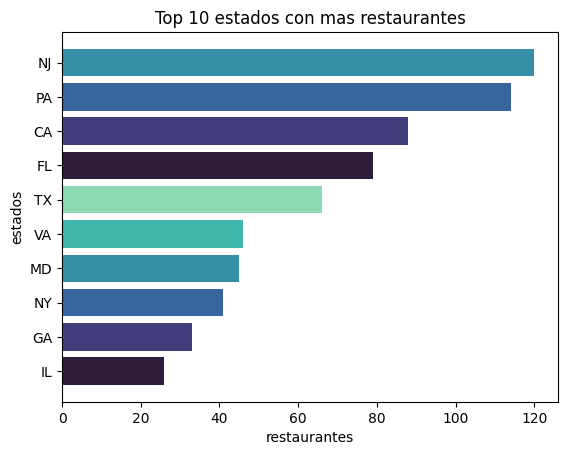

In [31]:
value_counts = metadata["state"].value_counts().head(10).sort_values(ascending=True)

plt.barh(value_counts.index, value_counts.values, color=sns.color_palette("mako"))

plt.xlabel("restaurantes")
plt.ylabel("estados")
plt.title("Top 10 estados con mas restaurantes")

plt.show()

Filtramos el dataset para quedarnos con los 5 primeros

In [32]:
metadata = metadata[~metadata['state'].isin(['NJ', 'PA', 'CA', 'FL', 'TX'])]

El siguiente grafico muestra los restaurantes con mas reseñas.

In [34]:
restaurantes_con_mas_reseñas = metadata.groupby("name")["num_of_reviews"].max().nlargest(10).sort_values(ascending=True)

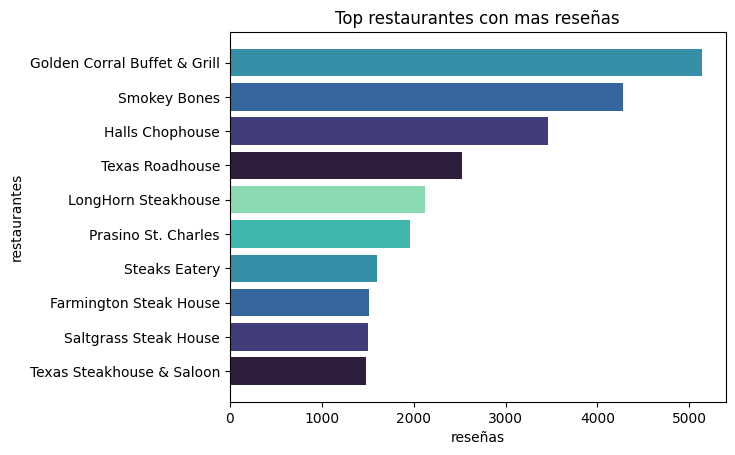

In [35]:
plt.barh(restaurantes_con_mas_reseñas.index, restaurantes_con_mas_reseñas.values, color=sns.color_palette("mako"))

plt.xlabel("reseñas")
plt.ylabel("restaurantes")
plt.title("Top 10 restaurantes con mas reseñas")
plt.show()

Consultar los restaurantes con mejor rating

In [36]:
df_rating = metadata[metadata['avg_rating'].isin([4.5, 5])]
df_rating.shape

(21, 15)

Grafico de los servicios mas comunes en los restaurantes con mejor rating

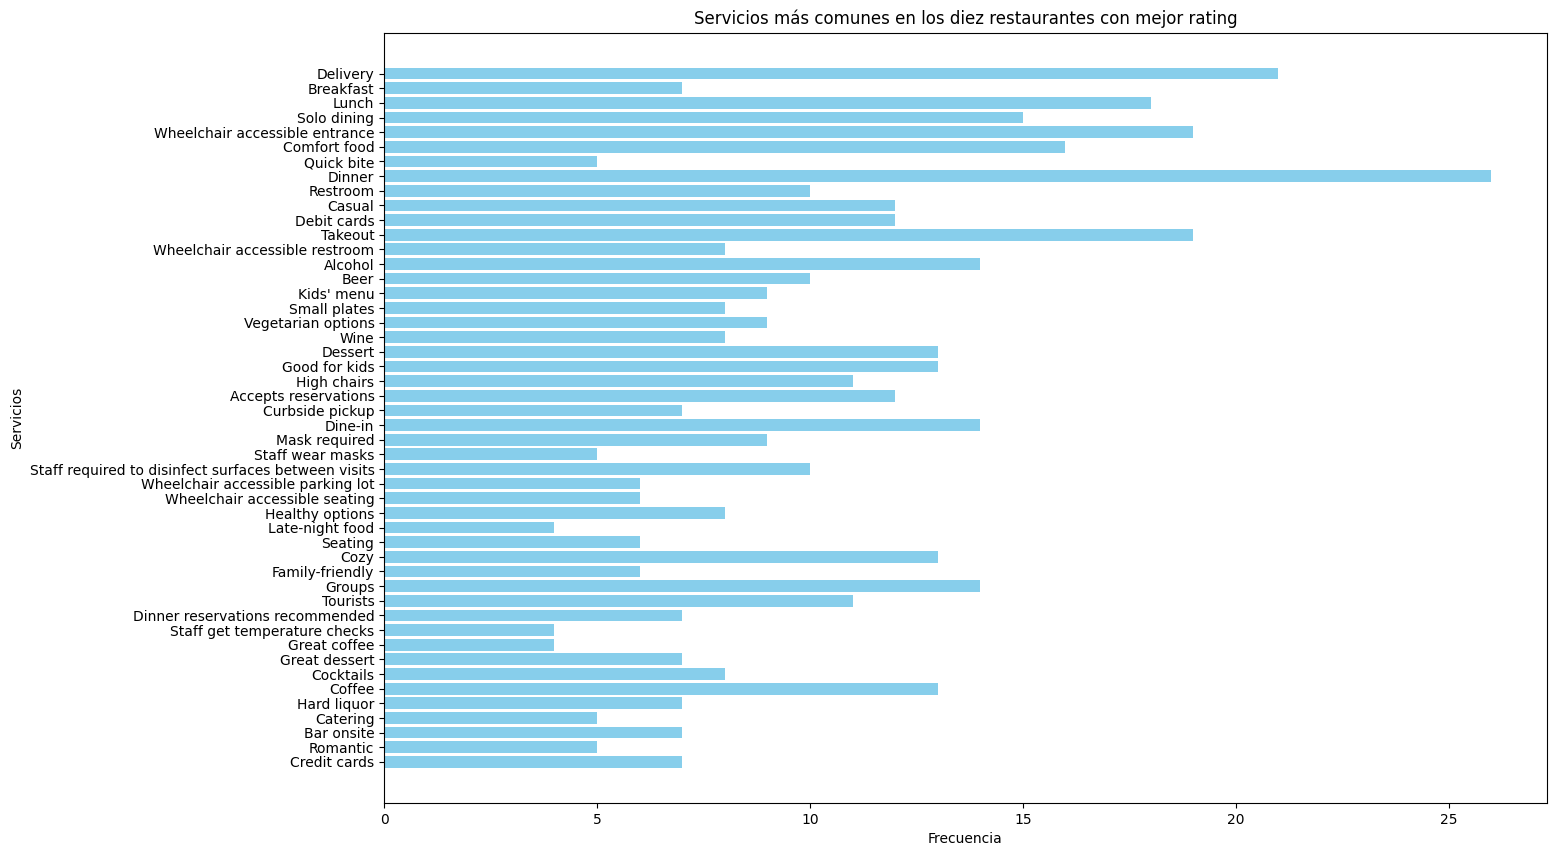

In [45]:
def count_occurrences(data, counts):
    if isinstance(data, dict):
        for value in data.values():
            count_occurrences(value, counts)
    elif isinstance(data, list):
        for item in data:
            count_occurrences(item, counts)
    else:
        counts[data] += 1

# Contar las ocurrencias
value_counts = Counter()

# Iterar por cada valor de los diccionarios en la columna "MISC"
for row in df_rating['MISC']:
    if pd.notna(row):  # Verificar que el valor no sea NaN
        count_occurrences(row, value_counts)

# Filtrar keys con más de 5 repeticiones
filtered_counts = {key: count for key, count in value_counts.items() if count > 3}

keys = list(filtered_counts.keys())
counts = list(filtered_counts.values())

# Crear gráfico de barras horizontales

plt.figure(figsize=(15, 10))
plt.barh(keys, counts, color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Servicios')
plt.title('Servicios más comunes en los diez restaurantes con mejor rating')
plt.gca().invert_yaxis()
plt.show()



Grafico de los servicios mas comunes en los restaurantes de manera general

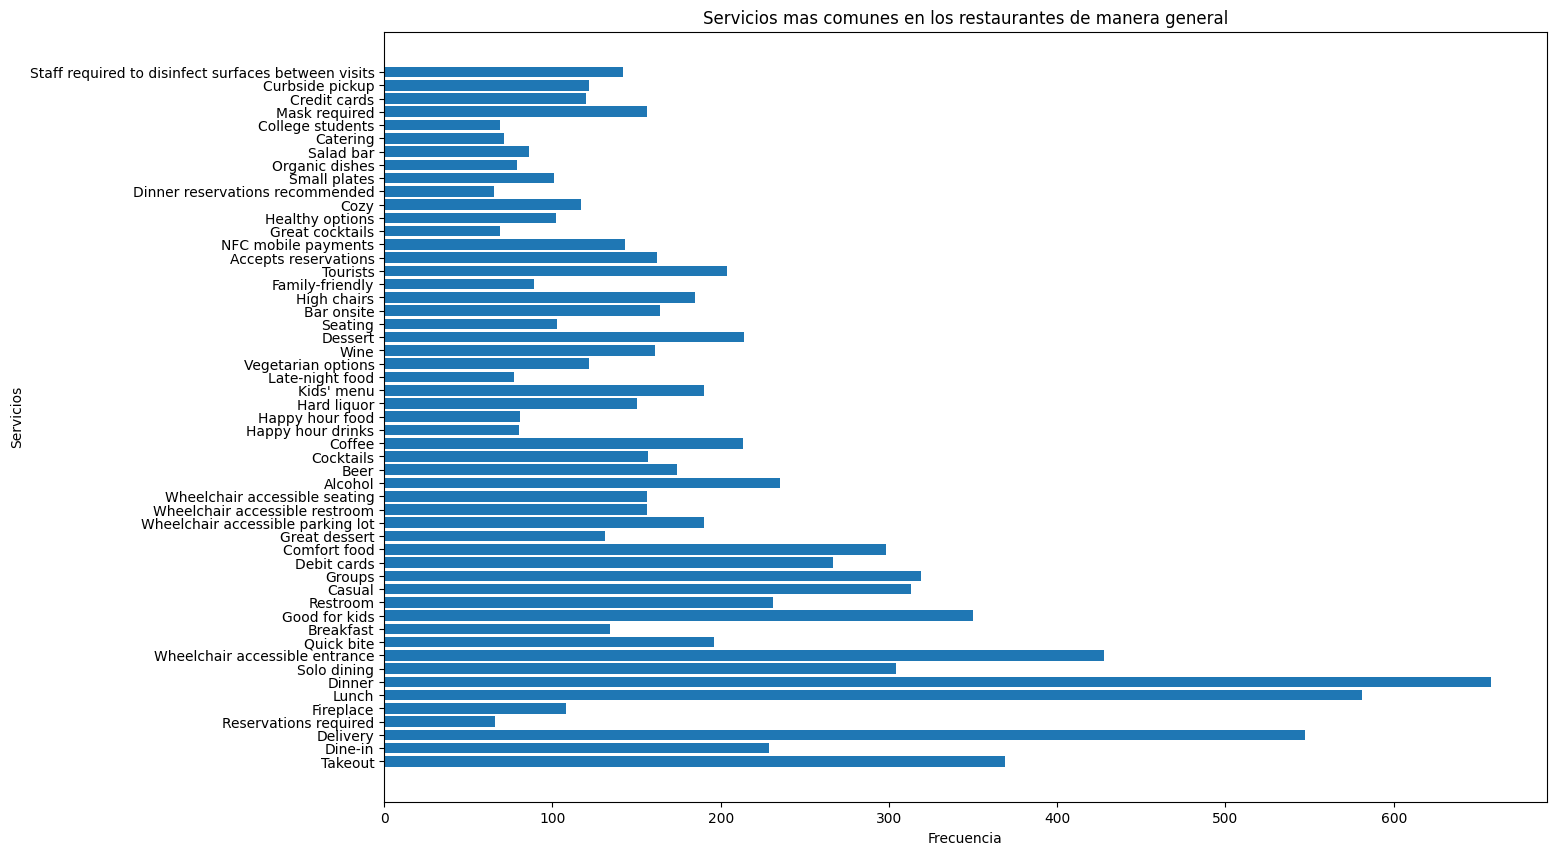

In [48]:
def count_occurrences(data, counts):
    if isinstance(data, dict):
        for value in data.values():
            count_occurrences(value, counts)
    elif isinstance(data, list):
        for item in data:
            count_occurrences(item, counts)
    else:
        counts[data] += 1

# Contar las ocurrencias
value_counts = Counter()

# Iterar por cada valor de los diccionarios en la columna "MISC"
for row in metadata['MISC']:
    if pd.notna(row):  # Verificar que el valor no sea NaN
        count_occurrences(row, value_counts)

# Filtrar keys con más de 60 repeticiones
filtered_counts = {key: count for key, count in value_counts.items() if count > 60}

keys = list(filtered_counts.keys())
counts = list(filtered_counts.values())

# Crear gráfico de barras horizontales
plt.figure(figsize=(15, 10))
plt.barh(keys, counts)
plt.xlabel('Frecuencia')
plt.ylabel('Servicios')
plt.title('Servicios mas comunes en los restaurantes de manera general')
plt.show()

Consulta y Grafico de la frecuencia de "abierto" por dia

In [49]:
def dias_diccionario(diccionario, fila):
    for dia, estado in fila:
        if estado.lower() == 'closed':
            diccionario[dia] -= 1
        else:
            diccionario[dia] += 1

# Crear el diccionario inicial con los días de la semana
dias_semana = ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']
diccionario = {dia: 0 for dia in dias_semana}

# Iterar por cada fila de la columna "hours" que no sea nula
for fila in metadata.loc[pd.notnull(metadata['hours']), 'hours']:
    dias_diccionario(diccionario, fila)

print(diccionario)

{'Tuesday': 488, 'Wednesday': 522, 'Thursday': 532, 'Friday': 528, 'Saturday': 516, 'Sunday': 402, 'Monday': 414}


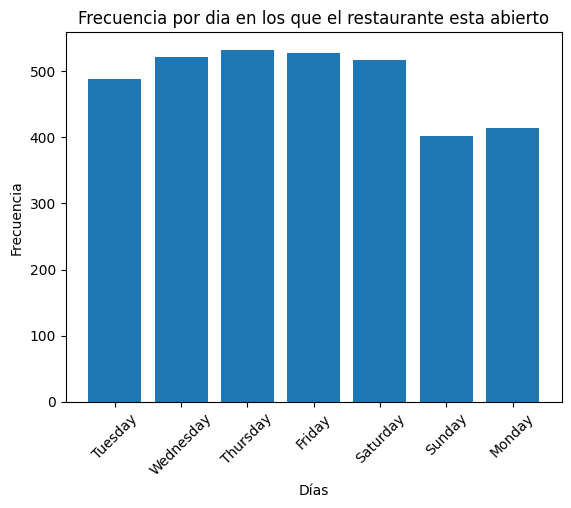

In [50]:
dias = list(diccionario.keys())
frecuencias = list(diccionario.values())

plt.bar(dias, frecuencias)
plt.xlabel("Días")
plt.ylabel("Frecuencia")
plt.title("Frecuencia por dia en los que el restaurante esta abierto")
plt.xticks(rotation=45)

plt.show()

In [ ]:
Guardar el DF

In [51]:
metadata.to_parquet('metadata_sitios.parquet')